<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora

# **Diferentes Métricas de Classificação**
Tempo estimado: **60** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Interpretar uma Curva ROC
* Calcular e interpretar os indicadores de um modelo de classificação



# Importar bibliotecas e ler os dados

In [3]:
# check Python version
!python -V

import pandas as pd # download library to read data into dataframe
import numpy as np # import numpy library
import matplotlib.pyplot as plt # plots
from matplotlib import cm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Data read into dataframe!") # takes about 30 seconds

file_path = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/Distribution_12k.csv"

starsData = pd.read_csv(file_path)
starsData.head()

Python 3.10.14
Data read into dataframe!


,Stars,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder
0,4.0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2
1,1.0,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3
2,5.0,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1
3,2.0,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3
4,5.0,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6


# Preparação do DataFrame



In [4]:
# fix name of the column displaying the Stars
column_names = starsData.columns.values
column_names[0] = "stars"
starsData.columns = column_names

# Limpa dados errados
starsData = starsData[(starsData["stars"] <= 5) & (starsData["stars"] >= 1)]

starsData = starsData.reset_index(drop=True) # É importante refazer o indice do dataFrame, apeos excluir linhas, pois pode gerar problema no SciKit Learn

# Separar o dataFrame em variáveis dependentes e independentes

stars = starsData["stars"] # Só a coluna "stars"

stars_class = stars[:]
variables = starsData.iloc[:,1:] # Todas as outras colunas com exceção da "stars"

# Adequação das variáveis categóricas em colunas binárias - OneHotEncoder

# conseguindo todas as colunas categóricas
cat = [i for i in variables.columns if variables[i].dtypes == "O"]

# excluindo DriverF_CD
cat.remove('DriverF_CD')

cat_one_hot_list = []
for i in cat:
    cat_one_hot_list.append(pd.get_dummies(variables[[i]])) #get_dummies transforma categorias em colunas e codifica binariamente

cat_one_hot_list.append(variables["RoutDeliveryOrder"])
cat_one_hot_list.append(variables["FloorCD"])

var1 = pd.concat(cat_one_hot_list, axis=1) #concatenando horizontamente


### Usaremos duas classes somente

In [5]:
#Como queremos somente duas categorias, seremos exigentes e chamaremos de ruim se tiver 3 ou menos estrelas e bom se tiver 4 ou mais estrela
stars_class.loc[stars <= 3] = 0
stars_class.loc[stars >= 4] = 1

In [6]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(var1, stars_class, test_size=0.25, random_state=42)

# Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

O que é acurácia:

$$Acurácia = \frac{VP + VN}{VP + VN + FP + FN}$$
Onde TP = verdadeiros positivos, TN = verdadeiros negativos, FP = falsos positivos, FN = falsos negativos.

O que é precision:

$$Precision = \frac{VP}{VP + FP}$$

O que é recall:

$$Recall = \frac{VP}{VP + FN}$$

O que é f1-score:

$$F1-score = 2\cdot\frac{precision\cdot recall}{precision + recall}$$

O que é ROC e AUC:

ROC é uma curva entre as taxas de verdadeiros positivos e falsos positivos. AUC é simplesmente a área abaixo deta curva.

In [8]:
#Demosntraremos essas métrica rapidamente com um modelo default random forest
rf = RandomForestClassifier(n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

Random Forest accuracy: 0.9840442852491045
Random Forest precision: 0.9825145711906744
Random Forest recall: 0.9768211920529801
Random Forest f1: 0.979659609796596
Random Forest roc_auc: 0.9827745251730279


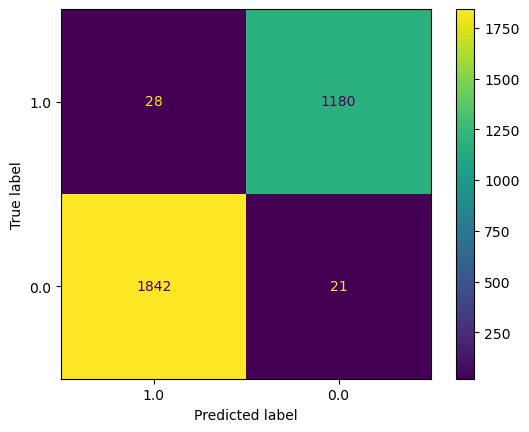

In [9]:
print(f'Random Forest accuracy: {accuracy_score(y_test,pred_rf)}')
print(f'Random Forest precision: {precision_score(y_test,pred_rf)}')
print(f'Random Forest recall: {recall_score(y_test,pred_rf)}')
print(f'Random Forest f1: {f1_score(y_test,pred_rf)}')
print(f'Random Forest roc_auc: {roc_auc_score(y_test,pred_rf)}')

cf_matrix_rf = confusion_matrix(y_test,pred_rf, labels=rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cf_matrix_rf[::-1], # [::-1] para imprimir a CM na ordem correta
                       display_labels=rf.classes_[::-1]).plot()

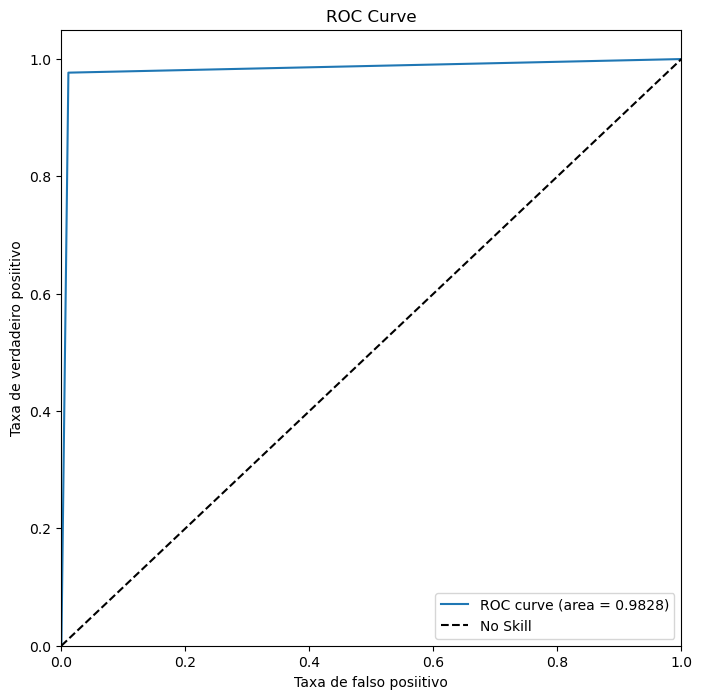

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, pred_rf) 
roc_auc = roc_auc_score(y_test,pred_rf)

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--', label='No Skill')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Taxa de falso posiitivo')
ax.set_ylabel('Taxa de verdadeiro posiitivo')
plt.title('ROC Curve')
ax.legend()
plt.show()

# Tentando melhorar as métricas

In [8]:
# utilizamos os dois principais parametros deste método
# n_estimators é a quantidade de arvores de decisão
# max_depth é a profundidade máxima das arvores de decisão
param_grid_rf = {'n_estimators':[10,20,50,100,200,400,800],'max_depth':[2,6,10,14,18,22,26]}

In [9]:
# Initialize random forest
rf = RandomForestClassifier(n_jobs=-1, random_state=0) # n_jobs permite processamento paralelo, random_state para que o modelo não mude (modelo baseado em aleatóriedade)

metrics = ['accuracy','precision','recall','f1','roc_auc']

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid_rf, cv=5, scoring=metrics, refit=False, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'max_depth': [2, 6, 10, 14, 18, 22, 26],
                         'n_estimators': [10, 20, 50, 100, 200, 400, 800]},
             refit=False,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [10]:
#To get the results of the gridsearch
grid_search.cv_results_

{'mean_fit_time': array([0.01768041, 0.01798725, 0.03260546, 0.06317725, 0.12424226,
        0.23564858, 0.4661828 , 0.01623139, 0.01792698, 0.04509516,
        0.07161999, 0.12536044, 0.24799128, 0.4856194 , 0.01664872,
        0.0307652 , 0.04648161, 0.07685151, 0.1482152 , 0.27487102,
        0.54280334, 0.01545296, 0.02897835, 0.04703074, 0.08822122,
        0.16217961, 0.3157867 , 0.62571692, 0.0160615 , 0.029636  ,
        0.05395303, 0.0964273 , 0.18335123, 0.34257283, 0.66716413,
        0.0159276 , 0.0298842 , 0.05685177, 0.0988184 , 0.18517275,
        0.36320806, 0.71731682, 0.01513419, 0.03048368, 0.05732937,
        0.09919896, 0.19291658, 0.38563013, 0.75615664]),
 'std_fit_time': array([0.00245405, 0.00017317, 0.0007184 , 0.00101826, 0.00088787,
        0.00065104, 0.00171586, 0.00090842, 0.00035784, 0.00087292,
        0.00598113, 0.00080511, 0.00178566, 0.0039128 , 0.00019825,
        0.00044952, 0.00082293, 0.00067566, 0.00412344, 0.00431709,
        0.00247656, 0.000

In [11]:
results = {'max_depth':[],'n_estimators':[],'accuracy':[],'precision':[],'recall':[],'f1':[],'roc_auc':[]}
for i in range(len(grid_search.cv_results_['params'])):
    results['max_depth'].append(grid_search.cv_results_['params'][i]['max_depth'])
    results['n_estimators'].append(grid_search.cv_results_['params'][i]['n_estimators'])
    results['accuracy'].append(grid_search.cv_results_['mean_test_accuracy'][i])
    results['precision'].append(grid_search.cv_results_['mean_test_precision'][i])
    results['recall'].append(grid_search.cv_results_['mean_test_recall'][i])
    results['f1'].append(grid_search.cv_results_['mean_test_f1'][i])
    results['roc_auc'].append(grid_search.cv_results_['mean_test_roc_auc'][i])
    
results = pd.DataFrame(results)

In [12]:
results

,max_depth,n_estimators,accuracy,precision,recall,f1,roc_auc
0,2,10,0.607166,0.000000,0.000000,0.000000,0.560843
1,2,20,0.607166,0.000000,0.000000,0.000000,0.569266
2,2,50,0.607166,0.000000,0.000000,0.000000,0.573718
3,2,100,0.607166,0.000000,0.000000,0.000000,0.576564
4,2,200,0.607166,0.000000,0.000000,0.000000,0.580747
5,2,400,0.607166,0.000000,0.000000,0.000000,0.583646
6,2,800,0.607166,0.000000,0.000000,0.000000,0.585288
7,6,10,0.620630,0.756986,0.050585,0.094683,0.680115
8,6,20,0.625081,0.806255,0.059702,0.111131,0.703637
9,6,50,0.621173,0.831262,0.043951,0.083242,0.726860


In [13]:
def function_to_plot_results(results,metric):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))

    # Make data.
    Y = results['max_depth'].unique()
    X = results['n_estimators'].unique()
    XX, YY = np.meshgrid(X, Y)
    Z = results[metric].array.reshape(-1,len(X))

    # Plot the surface.
    surf = ax.plot_surface(np.log10(XX), YY, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0, 1.01)
    ax.set_xticks(np.log10(X),X)
    ax.set_yticks(Y)
    ax.set_xlabel('n_estimators',fontsize=12)
    ax.set_ylabel('max_depth',fontsize=12)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=10)

    ax.set_title(metric,fontsize=24)

    plt.show()

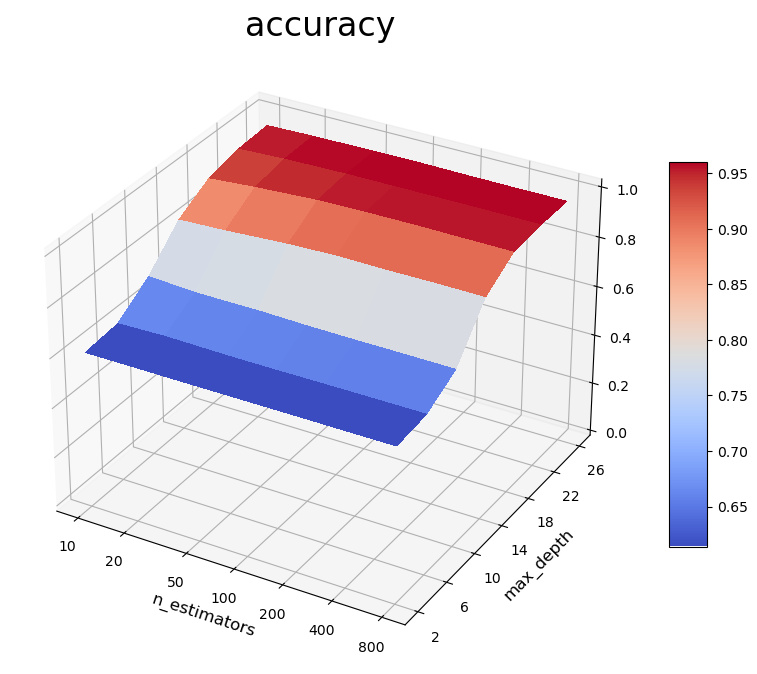

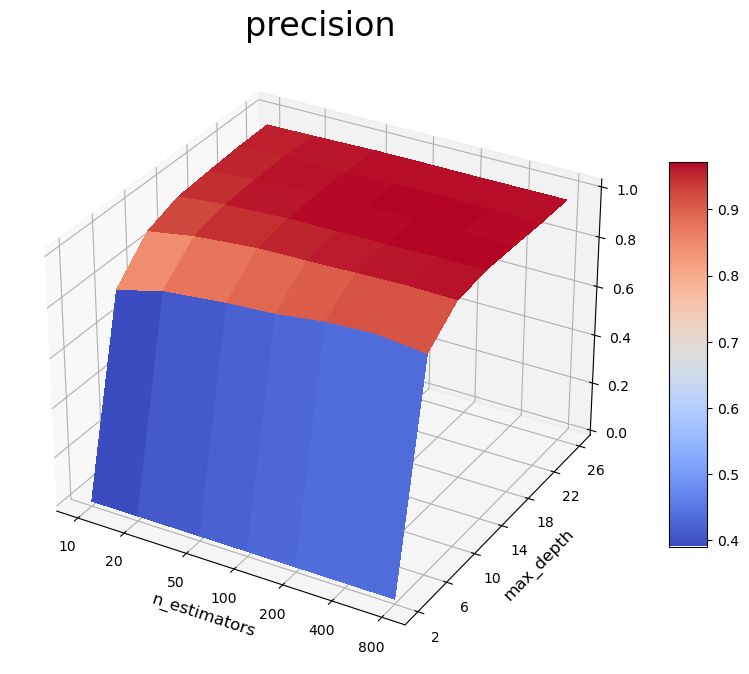

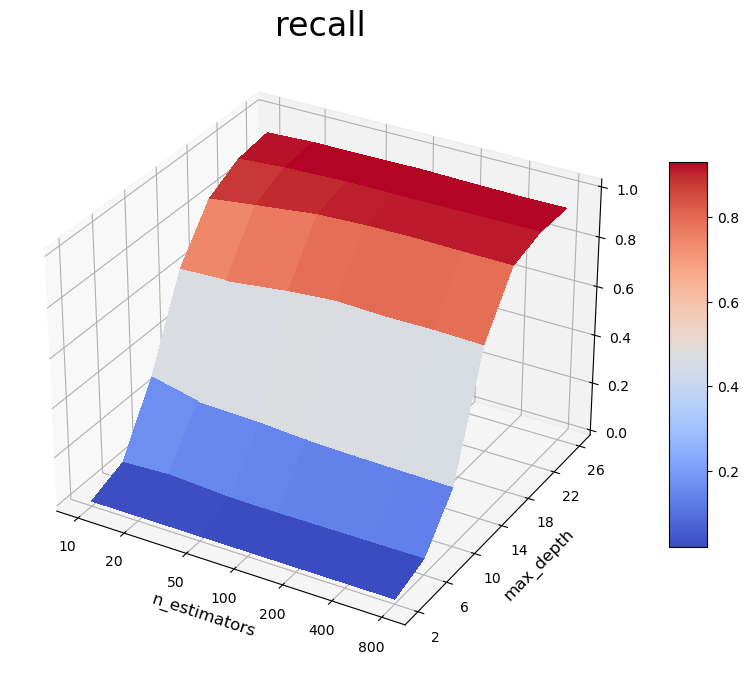

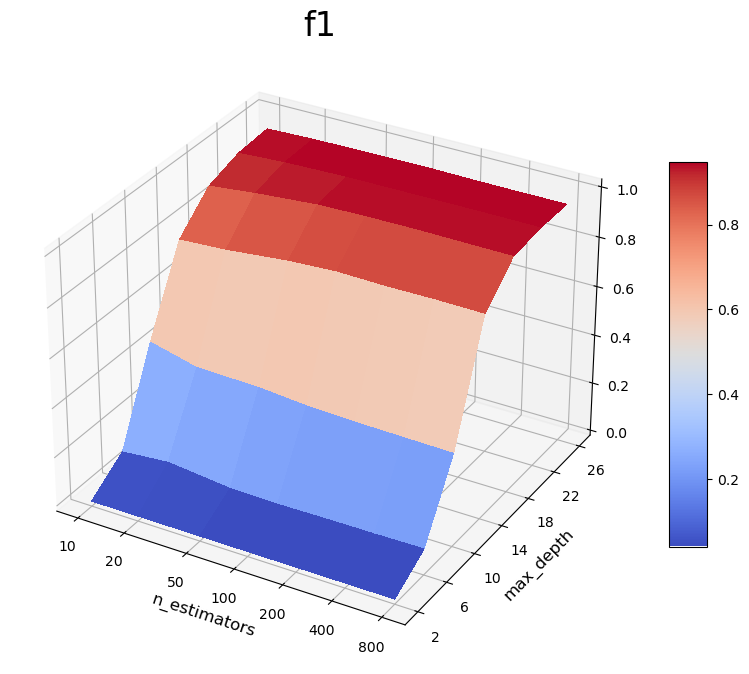

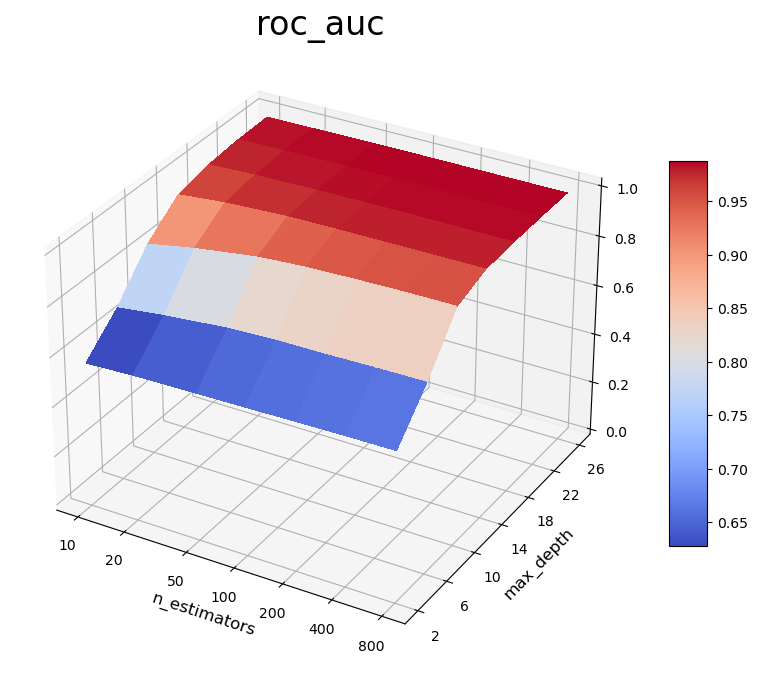

In [14]:
function_to_plot_results(results,'accuracy')
function_to_plot_results(results,'precision')
function_to_plot_results(results,'recall')
function_to_plot_results(results,'f1')
function_to_plot_results(results,'roc_auc')

In [15]:
#Melhor acurácia
print(results[['max_depth','n_estimators','accuracy']][results['accuracy'] == results['accuracy'].max()])

#Melhor precision
print(results[['max_depth','n_estimators','precision']][results['precision'] == results['precision'].max()])

#Melhor recall
print(results[['max_depth','n_estimators','recall']][results['recall'] == results['recall'].max()])

#Melhor f1
print(results[['max_depth','n_estimators','f1']][results['f1'] == results['f1'].max()])

#Melhor roc_auc
print(results[['max_depth','n_estimators','roc_auc']][results['roc_auc'] == results['roc_auc'].max()])

    max_depth  n_estimators  accuracy
45         26           100  0.961889
    max_depth  n_estimators  precision
27         14           800     0.9742
    max_depth  n_estimators    recall
45         26           100  0.936982
    max_depth  n_estimators        f1
45         26           100  0.950753
    max_depth  n_estimators   roc_auc
46         26           200  0.988806


In [16]:
#Nós temos dois possíveis modelos
#O que maximiza a acurácia, recall, f1, e roc_auc
rf_model_1 = RandomForestClassifier(max_depth=26,n_estimators=100,n_jobs=-1, random_state=0)
#O que maximiza a precision
rf_model_2 = RandomForestClassifier(max_depth=14,n_estimators=400,n_jobs=-1, random_state=0)

# Resultados Modelos Treinados

In [17]:
rf_model_1.fit(X_train, y_train)
rf_model_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=400, n_jobs=-1,
                       random_state=0)

In [18]:
pred_rf_1 = rf_model_1.predict(X_test)
pred_rf_2 = rf_model_2.predict(X_test)

In [19]:
print(f'Random Forest 1 accuracy: {accuracy_score(y_test,pred_rf_1)}')
print(f'Random Forest 2 accuracy: {accuracy_score(y_test,pred_rf_2)}')

Random Forest 1 accuracy: 0.9853467925757082
Random Forest 2 accuracy: 0.8804949527841094


In [20]:
print(f'Random Forest 1 precision: {precision_score(y_test,pred_rf_1)}')
print(f'Random Forest 2 precision: {precision_score(y_test,pred_rf_2)}')

Random Forest 1 precision: 0.984179850124896
Random Forest 2 precision: 0.991812865497076


In [21]:
print(f'Random Forest 1 recall: {recall_score(y_test,pred_rf_1)}')
print(f'Random Forest 2 recall: {recall_score(y_test,pred_rf_2)}')

Random Forest 1 recall: 0.9784768211920529
Random Forest 2 recall: 0.7019867549668874


In [22]:
print(f'Random Forest 1 f1: {f1_score(y_test,pred_rf_1)}')
print(f'Random Forest 2 f1: {f1_score(y_test,pred_rf_2)}')

Random Forest 1 f1: 0.9813200498132005
Random Forest 2 f1: 0.8221037324285022


In [23]:
print(f'Random Forest 1 roc_auc: {roc_auc_score(y_test,pred_rf_1)}')
print(f'Random Forest 2 roc_auc: {roc_auc_score(y_test,pred_rf_2)}')

Random Forest 1 roc_auc: 0.984139108395275
Random Forest 2 roc_auc: 0.8491146871989563


In [24]:
print(classification_report(y_test,pred_rf_1))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1863
         1.0       0.98      0.98      0.98      1208

    accuracy                           0.99      3071
   macro avg       0.99      0.98      0.98      3071
weighted avg       0.99      0.99      0.99      3071



In [25]:
print(classification_report(y_test,pred_rf_2))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      1863
         1.0       0.99      0.70      0.82      1208

    accuracy                           0.88      3071
   macro avg       0.91      0.85      0.87      3071
weighted avg       0.90      0.88      0.88      3071



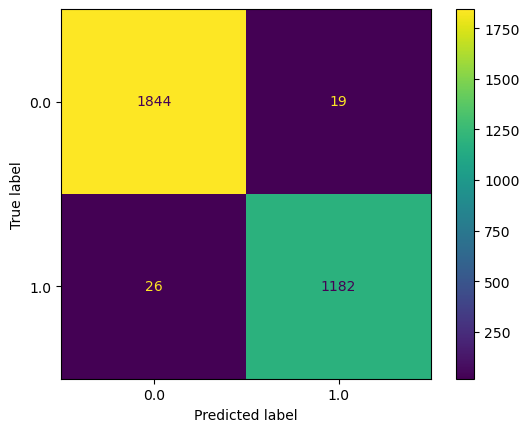

In [26]:
cf_matrix_rf = confusion_matrix(y_test,pred_rf_1, labels=rf_model_1.classes_)
ConfusionMatrixDisplay(confusion_matrix=cf_matrix_rf,
                       display_labels=rf_model_1.classes_).plot()

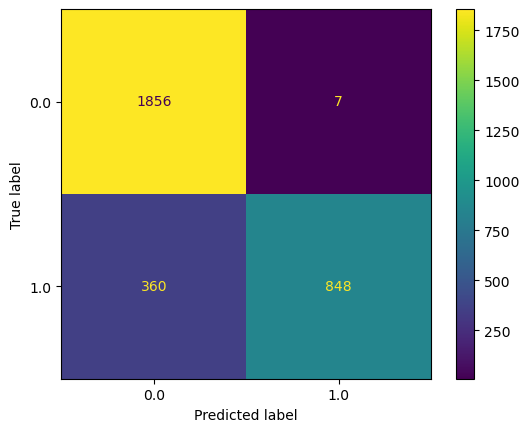

In [27]:
cf_matrix_rf = confusion_matrix(y_test,pred_rf_2, labels=rf_model_2.classes_)
ConfusionMatrixDisplay(confusion_matrix=cf_matrix_rf,
                       display_labels=rf_model_2.classes_).plot()

## Autor

<a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 06-11-2024       | 1.0     | João Gabriel    | Inicial              |

<hr>